![Image](https://user.oc-static.com/upload/2019/02/24/15510245026714_Seattle_logo_landscape_blue-black.png)

In [1]:
# Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display


from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split  
from sklearn import model_selection

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [2]:
# Importation de la base de données

data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')
pd.options.display.max_columns = None
display(data.head())

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [3]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [4]:
data['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Low-Rise Multifamily',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'High-Rise Multifamily',
       'Office'], dtype=object)

In [5]:
data.shape

(3376, 46)

# Nettoyage des données

In [6]:
# Première série de suppression de variables

columns= ['OSEBuildingID', 'DataYear', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 
          'CouncilDistrictCode', 'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors', 'ListOfAllPropertyUseTypes',
          'PropertyGFAParking', 'PropertyGFABuilding(s)','YearsENERGYSTARCertified', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
          'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SteamUse(kBtu)', 'Electricity(kWh)',
          'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
          'Outlier']

data.drop(columns=columns, inplace=True)

In [7]:
data['EmpreinteCarbone(Kg)'] = data['PropertyGFATotal']*data['GHGEmissionsIntensity']

In [8]:
data_tri = data.sort_values(by='PropertyGFATotal', ascending=False)
data_tri.head(25)

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,EmpreinteCarbone(Kg)
3274,Campus,University,NORTHEAST,1900,9320156,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,873923712.0,0.0,11140.56,1.20,11184187.20
1494,Campus,University,EAST,1939,2200000,College/University,1719643.0,Parking,318960.0,NaN,NaN,NaN,114648520.0,123205560.0,3243.48,1.47,3234000.00
559,NonResidential,Large Office,DOWNTOWN,1985,1952220,Office,1680937.0,Parking,319368.0,NaN,NaN,86.0,92937640.0,92537256.0,882.56,0.45,878499.00
618,NonResidential,Hospital,EAST,1994,1765970,Hospital (General Medical & Surgical),1639334.0,Parking,441551.0,NaN,NaN,54.0,291614432.0,295929888.0,12307.16,6.97,12308810.90
292,NonResidential,Large Office,DOWNTOWN,1989,1605578,Office,1314475.0,Parking,389860.0,Other,30744.0,97.0,49517704.0,50984500.0,525.78,0.33,529840.74
490,NonResidential,Large Office,DOWNTOWN,2005,1592914,Office,914832.0,Parking,348788.0,Financial Office,303910.0,97.0,56498868.0,56785916.0,481.06,0.30,477874.20
155,NonResidential,Other,GREATER DUWAMISH,1999,1585960,Other - Entertainment/Public Assembly,1585960.0,Parking,0.0,NaN,NaN,NaN,59757440.0,62160304.0,892.63,0.56,888137.60
273,NonResidential,Large Office,DOWNTOWN,1989,1536606,Office,1002403.0,Parking,377046.0,Other,53116.0,89.0,56606136.0,58506844.0,530.18,0.35,537812.10
304,NonResidential,Other,DOWNTOWN,1990,1400000,Convention Center,1072000.0,Parking,686750.0,NaN,NaN,NaN,0.0,0.0,0.00,0.00,0.00
271,NonResidential,Large Office,DOWNTOWN,1988,1400000,Office,994116.0,Parking,264481.0,Other,133598.0,92.0,53079164.0,55140300.0,588.90,0.42,588000.00


In [9]:
data[data['PrimaryPropertyType'] == 'Hospital']

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,EmpreinteCarbone(Kg)
98,NonResidential,Hospital,BALLARD,1954,285333,Hospital (General Medical & Surgical),302661.0,Parking,148865.0,NaN,NaN,14.0,6.809073e+07,4.760272e+07,1990.50,6.98,1991624.34
124,NonResidential,Hospital,NORTHEAST,1953,879000,Hospital (General Medical & Surgical),879000.0,NaN,NaN,NaN,NaN,10.0,2.538325e+08,2.577642e+08,8145.52,9.27,8148330.00
167,NonResidential,Hospital,CENTRAL,1990,597519,Hospital (General Medical & Surgical),601615.0,Parking,48607.0,NaN,NaN,34.0,1.434230e+08,1.472991e+08,4906.33,8.21,4905630.99
170,NonResidential,Hospital,EAST,2000,1158691,Hospital (General Medical & Surgical),1350182.0,Parking,387651.0,NaN,NaN,29.0,2.930908e+08,2.966717e+08,10734.57,9.26,10729478.66
355,NonResidential,Hospital,LAKE UNION,2000,351530,Hospital (General Medical & Surgical),215602.0,NaN,NaN,NaN,NaN,23.0,4.270962e+07,4.317802e+07,1032.63,2.94,1033498.20
618,NonResidential,Hospital,EAST,1994,1765970,Hospital (General Medical & Surgical),1639334.0,Parking,441551.0,NaN,NaN,54.0,2.916144e+08,2.959299e+08,12307.16,6.97,12308810.90
1672,NonResidential,Hospital,NORTHWEST,1966,415632,Hospital (General Medical & Surgical),483520.0,Parking,266833.0,NaN,NaN,85.0,9.896078e+07,1.003283e+08,3278.11,7.89,3279336.48
2482,NonResidential,Hospital,SOUTHWEST,1961,54863,Hospital (General Medical & Surgical),109726.0,NaN,NaN,NaN,NaN,100.0,2.037721e+06,2.066851e+06,14.21,0.26,14264.38
3187,NonResidential,Hospital,NORTHEAST,2013,330000,Hospital (General Medical & Surgical),241500.0,NaN,NaN,NaN,NaN,58.0,5.776441e+07,5.776441e+07,1789.69,5.42,1788600.00
3264,NonResidential,Hospital,EAST,1920,374466,Hospital (General Medical & Surgical),1010135.0,NaN,NaN,NaN,NaN,74.0,1.639460e+08,1.672071e+08,6330.91,16.91,6332220.06


In [10]:
No_valeur = data[data['EmpreinteCarbone(Kg)'] <= 0]
No_valeur

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,EmpreinteCarbone(Kg)
28,SPS-District K-12,K-12 School,Central,1955,126351,K-12 School,126351.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.00,0.00,0.0
152,SPS-District K-12,K-12 School,NORTH,1989,52792,K-12 School,55480.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.00,0.00,0.0
304,NonResidential,Other,DOWNTOWN,1990,1400000,Convention Center,1072000.0,Parking,686750.0,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.00,0.00,0.0
513,NonResidential,Supermarket / Grocery Store,MAGNOLIA / QUEEN ANNE,2008,57176,Supermarket/Grocery Store,39500.0,Retail Store,15000.0,"Personal Services (Health/Beauty, Dry Cleaning...",5500.0,31.0,1.252517e+07,1.284386e+07,0.00,0.00,0.0
746,NonResidential,Other,NORTHWEST,2002,29924,Other - Education,29924.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.00,0.00,0.0
760,Multifamily LR (1-4),Other,DOWNTOWN,1909,30700,Other,19034.0,Multifamily Housing,11666.0,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.00,0.00,0.0
1229,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,1903,57720,Office,25000.0,NaN,NaN,NaN,NaN,NaN,2.410550e+04,2.410550e+04,0.17,0.00,0.0
1323,Multifamily LR (1-4),Low-Rise Multifamily,LAKE UNION,1974,37361,Multifamily Housing,27732.0,NaN,NaN,NaN,NaN,61.0,8.801155e+05,9.197677e+05,0.00,0.00,0.0
1361,SPS-District K-12,K-12 School,NORTH,1954,42292,K-12 School,43188.0,NaN,NaN,NaN,NaN,100.0,0.000000e+00,0.000000e+00,0.00,0.00,0.0
1549,Multifamily LR (1-4),Low-Rise Multifamily,North,1988,47647,Multifamily Housing,47647.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.00,0.00,0.0


In [11]:
def remplacer(row):
  if row['EmpreinteCarbone(Kg)'] == 0 :
    row['EmpreinteCarbone(Kg)'] = row['TotalGHGEmissions']*1000
  elif row['EmpreinteCarbone(Kg)'] < 0 :
    row['EmpreinteCarbone(Kg)'] = row['TotalGHGEmissions']* -1000
  return row

# Appliquer la fonction de remplacement sur chaque ligne du DataFrame
data = data.apply(remplacer, axis=1)

In [12]:
No_valeur = data[data['EmpreinteCarbone(Kg)'] <= 0].index
No_valeur

Index([28, 152, 304, 513, 746, 760, 1323, 1361, 1549], dtype='int64')

In [13]:
data.drop(No_valeur, inplace=True)

In [14]:
# Deuxième série de suppression de variables

data.drop(columns=['PropertyGFATotal', 'TotalGHGEmissions', 'GHGEmissionsIntensity', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)'], inplace=True)

In [15]:
data

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,EmpreinteCarbone(Kg)
0,NonResidential,Hotel,DOWNTOWN,1927,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,250268.22
1,NonResidential,Hotel,DOWNTOWN,1996,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,296198.76
2,NonResidential,Hotel,DOWNTOWN,1969,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,2093880.90
3,NonResidential,Hotel,DOWNTOWN,1926,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,286364.40
4,NonResidential,Hotel,DOWNTOWN,1980,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,505670.40
...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,GREATER DUWAMISH,1990,Office,12294.0,NaN,NaN,NaN,NaN,46.0,20899.80
3372,Nonresidential COS,Other,DOWNTOWN,2004,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,32160.00
3373,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,223537.43
3374,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,NaN,22138.57


In [16]:
# Suppression des individus "destinés à l'habitation"

Res_1 = data[data['BuildingType']=='Multifamily MR (5-9)'].index
Res_2 = data[data['BuildingType']=='Multifamily LR (1-4)'].index
Res_3 = data[data['BuildingType']=='Multifamily HR (10+)'].index
data.drop(Res_1, inplace=True)

In [17]:
data.drop(Res_2, inplace=True)

In [18]:
data.drop(Res_3, inplace=True)


In [19]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [20]:
data[data['PrimaryPropertyType']=='Low-Rise Multifamily']

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,EmpreinteCarbone(Kg)
644,NonResidential,Low-Rise Multifamily,LAKE UNION,2000,Multifamily Housing,91064.0,NaN,NaN,NaN,NaN,32.0,26062.12
1300,Campus,Low-Rise Multifamily,DOWNTOWN,1942,Multifamily Housing,22669.0,Retail Store,10455.0,Restaurant,3668.0,NaN,26390.00
2450,NonResidential,Low-Rise Multifamily,EAST,1910,Multifamily Housing,21400.0,Bar/Nightclub,10700.0,NaN,NaN,NaN,5136.00


In [21]:
# Troisième série de suppression de variables

data.drop(columns=['BuildingType', 'PrimaryPropertyType'], inplace=True)

In [22]:
data

,Neighborhood,YearBuilt,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,EmpreinteCarbone(Kg)
0,DOWNTOWN,1927,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,250268.22
1,DOWNTOWN,1996,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,296198.76
2,DOWNTOWN,1969,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,2093880.90
3,DOWNTOWN,1926,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,286364.40
4,DOWNTOWN,1980,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,505670.40
...,...,...,...,...,...,...,...,...,...,...
3371,GREATER DUWAMISH,1990,Office,12294.0,NaN,NaN,NaN,NaN,46.0,20899.80
3372,DOWNTOWN,2004,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,32160.00
3373,MAGNOLIA / QUEEN ANNE,1974,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,223537.43
3374,GREATER DUWAMISH,1989,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,NaN,22138.57


In [23]:
data['Neighborhood'].value_counts()

Neighborhood
DOWNTOWN                  360
GREATER DUWAMISH          346
MAGNOLIA / QUEEN ANNE     150
LAKE UNION                148
NORTHEAST                 128
EAST                      121
NORTHWEST                  80
BALLARD                    64
NORTH                      56
CENTRAL                    51
SOUTHEAST                  46
DELRIDGE                   42
SOUTHWEST                  41
North                       9
Ballard                     6
Northwest                   5
Delridge                    4
Central                     4
DELRIDGE NEIGHBORHOODS      1
Name: count, dtype: int64

In [24]:
remplacements = {'North': 'NORTH',
                 'Ballard': 'BALLARD',
                'Central': 'CENTRAL',
                'Northwest': 'NORTHWEST',
                'Delridge': 'DELRIDGE',
                'DELRIDGE NEIGHBORHOODS': 'DELRIDGE'}

# Remplacer les valeurs en utilisant le dictionnaire
data['Neighborhood'] = data['Neighborhood'].replace(remplacements)

In [25]:
data['Neighborhood'].value_counts()

Neighborhood
DOWNTOWN                 360
GREATER DUWAMISH         346
MAGNOLIA / QUEEN ANNE    150
LAKE UNION               148
NORTHEAST                128
EAST                     121
NORTHWEST                 85
BALLARD                   70
NORTH                     65
CENTRAL                   55
DELRIDGE                  47
SOUTHEAST                 46
SOUTHWEST                 41
Name: count, dtype: int64

In [26]:
nan_rows= data[data['EmpreinteCarbone(Kg)'].isnull()].index
nan_rows

Index([578, 2670], dtype='int64')

In [27]:
data.drop(nan_rows, inplace=True)

In [28]:
data

,Neighborhood,YearBuilt,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,EmpreinteCarbone(Kg)
0,DOWNTOWN,1927,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,250268.22
1,DOWNTOWN,1996,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,296198.76
2,DOWNTOWN,1969,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,2093880.90
3,DOWNTOWN,1926,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,286364.40
4,DOWNTOWN,1980,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,505670.40
...,...,...,...,...,...,...,...,...,...,...
3371,GREATER DUWAMISH,1990,Office,12294.0,NaN,NaN,NaN,NaN,46.0,20899.80
3372,DOWNTOWN,2004,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,32160.00
3373,MAGNOLIA / QUEEN ANNE,1974,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,223537.43
3374,GREATER DUWAMISH,1989,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,NaN,22138.57


In [29]:
data.isnull().sum()

Neighborhood                          0
YearBuilt                             0
LargestPropertyUseType                4
LargestPropertyUseTypeGFA             4
SecondLargestPropertyUseType        807
SecondLargestPropertyUseTypeGFA     807
ThirdLargestPropertyUseType        1308
ThirdLargestPropertyUseTypeGFA     1308
ENERGYSTARScore                     568
EmpreinteCarbone(Kg)                  0
dtype: int64

In [30]:
nan_rows2 = data[data['LargestPropertyUseType'].isnull()].index
nan_rows2

Index([353, 1147, 2414, 2459], dtype='int64')

In [31]:
data.drop(nan_rows2, inplace=True)

In [32]:
data = data.reset_index()
data = data.drop(columns=['index'])

In [33]:
data_CO2 = data.drop(columns=['ENERGYSTARScore'])

In [34]:
data_CO2

,Neighborhood,YearBuilt,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,EmpreinteCarbone(Kg)
0,DOWNTOWN,1927,Hotel,88434.0,NaN,NaN,NaN,NaN,250268.22
1,DOWNTOWN,1996,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,296198.76
2,DOWNTOWN,1969,Hotel,756493.0,NaN,NaN,NaN,NaN,2093880.90
3,DOWNTOWN,1926,Hotel,61320.0,NaN,NaN,NaN,NaN,286364.40
4,DOWNTOWN,1980,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,505670.40
...,...,...,...,...,...,...,...,...,...
1651,GREATER DUWAMISH,1990,Office,12294.0,NaN,NaN,NaN,NaN,20899.80
1652,DOWNTOWN,2004,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,32160.00
1653,MAGNOLIA / QUEEN ANNE,1974,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,223537.43
1654,GREATER DUWAMISH,1989,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,22138.57


In [35]:
data_CO2 = pd.get_dummies(data_CO2, columns=['Neighborhood', 'LargestPropertyUseType',
                                                               'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType'])

In [36]:
data_CO2

,YearBuilt,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,EmpreinteCarbone(Kg),Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,LargestPropertyUseType_Adult Education,LargestPropertyUseType_Automobile Dealership,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_College/University,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Fire Station,LargestPropertyUseType_Fitness Center/Health Club/Gym,LargestPropertyUseType_Food Service,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Library,LargestPropertyUseType_Lifestyle Center,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Movie Theater,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Museum,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Education,LargestPropertyUseType_Other - Entertainment/Public Assembly,LargestPropertyUseType_Other - Lodging/Residential,LargestPropertyUseType_Other - Mall,LargestPropertyUseType_Other - Public Services,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Other - Services,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,SecondLargestPropertyUseType_Adult Education,SecondLargestPropertyUseType_Automobile Dealership,SecondLargestPropertyUseType_Bank Branch,SecondLargestPropertyUseType_Bar/Nightclub,SecondLargestPropertyUseType_College/University,SecondLargestPropertyUseType_Convenience Store without Gas Station,SecondLargestPropertyUseType_Courthouse,SecondLargestPropertyUseType_Data Center,SecondLargestPropertyUseType_Distribution Center,SecondLargestPropertyUseType_Enclosed Mall,SecondLargestPropertyUseType_Financial Office,SecondLargestPropertyUseType_Fitness Center/Health Club/Gym,SecondLargestPropertyUseType_Food Sales,SecondLargestPropertyUseType_Food Service,SecondLargestPropertyUseType_Hospital (General Medical & Surgical),SecondLargestPropertyUseType_Hotel,SecondLargestPropertyUseType_K-12 School,SecondLargestPropertyUseType_Laboratory,SecondLargestPropertyUseType_Manufacturing/Industrial Plant,SecondLargestPropertyUseType_Medical Office,SecondLargestPropertyUseType_Movie Theater,SecondLargestPropertyUseType_Multifamily Housing,SecondLargestPropertyUseType_Non-Refrigerated Warehouse,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Other - Education,SecondLarges

In [37]:
columns = ['LargestPropertyUseType_Adult Education',
 'LargestPropertyUseType_Automobile Dealership',
 'LargestPropertyUseType_Bank Branch',
 'LargestPropertyUseType_College/University',
 'LargestPropertyUseType_Courthouse',
 'LargestPropertyUseType_Data Center',
 'LargestPropertyUseType_Distribution Center',
 'LargestPropertyUseType_Financial Office',
 'LargestPropertyUseType_Fire Station',
 'LargestPropertyUseType_Fitness Center/Health Club/Gym',
 'LargestPropertyUseType_Food Service',
 'LargestPropertyUseType_Hospital (General Medical & Surgical)',
 'LargestPropertyUseType_Hotel',
 'LargestPropertyUseType_K-12 School',
 'LargestPropertyUseType_Laboratory',
 'LargestPropertyUseType_Library',
 'LargestPropertyUseType_Lifestyle Center',
 'LargestPropertyUseType_Manufacturing/Industrial Plant',
 'LargestPropertyUseType_Medical Office',
 'LargestPropertyUseType_Movie Theater',
 'LargestPropertyUseType_Multifamily Housing',
 'LargestPropertyUseType_Museum',
 'LargestPropertyUseType_Non-Refrigerated Warehouse',
 'LargestPropertyUseType_Office',
 'LargestPropertyUseType_Other',
 'LargestPropertyUseType_Other - Education',
 'LargestPropertyUseType_Other - Entertainment/Public Assembly',
 'LargestPropertyUseType_Other - Lodging/Residential',
 'LargestPropertyUseType_Other - Mall',
 'LargestPropertyUseType_Other - Public Services',
 'LargestPropertyUseType_Other - Recreation',
 'LargestPropertyUseType_Other - Restaurant/Bar',
 'LargestPropertyUseType_Other - Services',
 'LargestPropertyUseType_Other - Utility',
 'LargestPropertyUseType_Other/Specialty Hospital',
 'LargestPropertyUseType_Parking',
 'LargestPropertyUseType_Performing Arts',
 'LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)',
 'LargestPropertyUseType_Police Station',
 'LargestPropertyUseType_Pre-school/Daycare',
 'LargestPropertyUseType_Prison/Incarceration',
 'LargestPropertyUseType_Refrigerated Warehouse',
 'LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)',
 'LargestPropertyUseType_Residence Hall/Dormitory',
 'LargestPropertyUseType_Residential Care Facility',
 'LargestPropertyUseType_Restaurant',
 'LargestPropertyUseType_Retail Store',
 'LargestPropertyUseType_Self-Storage Facility',
 'LargestPropertyUseType_Senior Care Community',
 'LargestPropertyUseType_Social/Meeting Hall',
 'LargestPropertyUseType_Strip Mall',
 'LargestPropertyUseType_Supermarket/Grocery Store',
 'LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient',
 'LargestPropertyUseType_Wholesale Club/Supercenter',
 'LargestPropertyUseType_Worship Facility']

for column in columns:
    data_CO2[column] = data_CO2.apply(lambda row: row['LargestPropertyUseTypeGFA'] if row[column] == 1 else row[column], axis=1)

In [38]:
columns = ['SecondLargestPropertyUseType_Adult Education',
 'SecondLargestPropertyUseType_Automobile Dealership',
 'SecondLargestPropertyUseType_Bank Branch',
 'SecondLargestPropertyUseType_Bar/Nightclub',
 'SecondLargestPropertyUseType_College/University',
 'SecondLargestPropertyUseType_Convenience Store without Gas Station',
 'SecondLargestPropertyUseType_Courthouse',
 'SecondLargestPropertyUseType_Data Center',
 'SecondLargestPropertyUseType_Distribution Center',
 'SecondLargestPropertyUseType_Enclosed Mall',
 'SecondLargestPropertyUseType_Financial Office',
 'SecondLargestPropertyUseType_Fitness Center/Health Club/Gym',
 'SecondLargestPropertyUseType_Food Sales',
 'SecondLargestPropertyUseType_Food Service',
 'SecondLargestPropertyUseType_Hospital (General Medical & Surgical)',
 'SecondLargestPropertyUseType_Hotel',
 'SecondLargestPropertyUseType_K-12 School',
 'SecondLargestPropertyUseType_Laboratory',
 'SecondLargestPropertyUseType_Manufacturing/Industrial Plant',
 'SecondLargestPropertyUseType_Medical Office',
 'SecondLargestPropertyUseType_Movie Theater',
 'SecondLargestPropertyUseType_Multifamily Housing',
 'SecondLargestPropertyUseType_Non-Refrigerated Warehouse',
 'SecondLargestPropertyUseType_Office',
 'SecondLargestPropertyUseType_Other',
 'SecondLargestPropertyUseType_Other - Education',
 'SecondLargestPropertyUseType_Other - Entertainment/Public Assembly',
 'SecondLargestPropertyUseType_Other - Lodging/Residential',
 'SecondLargestPropertyUseType_Other - Public Services',
 'SecondLargestPropertyUseType_Other - Recreation',
 'SecondLargestPropertyUseType_Other - Restaurant/Bar',
 'SecondLargestPropertyUseType_Other - Services',
 'SecondLargestPropertyUseType_Parking',
 'SecondLargestPropertyUseType_Performing Arts',
 'SecondLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)',
 'SecondLargestPropertyUseType_Pre-school/Daycare',
 'SecondLargestPropertyUseType_Refrigerated Warehouse',
 'SecondLargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)',
 'SecondLargestPropertyUseType_Residence Hall/Dormitory',
 'SecondLargestPropertyUseType_Restaurant',
 'SecondLargestPropertyUseType_Retail Store',
 'SecondLargestPropertyUseType_Self-Storage Facility',
 'SecondLargestPropertyUseType_Social/Meeting Hall',
 'SecondLargestPropertyUseType_Supermarket/Grocery Store',
 'SecondLargestPropertyUseType_Swimming Pool',
 'SecondLargestPropertyUseType_Vocational School',
 'SecondLargestPropertyUseType_Worship Facility']

for column in columns:
    data_CO2[column] = data_CO2.apply(lambda row: row['SecondLargestPropertyUseTypeGFA'] if row[column] == 1 else row[column], axis=1)

In [39]:
columns = ['ThirdLargestPropertyUseType_Bank Branch',
 'ThirdLargestPropertyUseType_Bar/Nightclub',
 'ThirdLargestPropertyUseType_Convenience Store without Gas Station',
 'ThirdLargestPropertyUseType_Data Center',
 'ThirdLargestPropertyUseType_Distribution Center',
 'ThirdLargestPropertyUseType_Fast Food Restaurant',
 'ThirdLargestPropertyUseType_Financial Office',
 'ThirdLargestPropertyUseType_Fitness Center/Health Club/Gym',
 'ThirdLargestPropertyUseType_Food Service',
 'ThirdLargestPropertyUseType_Hotel',
 'ThirdLargestPropertyUseType_K-12 School',
 'ThirdLargestPropertyUseType_Laboratory',
 'ThirdLargestPropertyUseType_Manufacturing/Industrial Plant',
 'ThirdLargestPropertyUseType_Medical Office',
 'ThirdLargestPropertyUseType_Multifamily Housing',
 'ThirdLargestPropertyUseType_Non-Refrigerated Warehouse',
 'ThirdLargestPropertyUseType_Office',
 'ThirdLargestPropertyUseType_Other',
 'ThirdLargestPropertyUseType_Other - Education',
 'ThirdLargestPropertyUseType_Other - Entertainment/Public Assembly',
 'ThirdLargestPropertyUseType_Other - Recreation',
 'ThirdLargestPropertyUseType_Other - Restaurant/Bar',
 'ThirdLargestPropertyUseType_Other - Services',
 'ThirdLargestPropertyUseType_Other - Technology/Science',
 'ThirdLargestPropertyUseType_Other - Utility',
 'ThirdLargestPropertyUseType_Other/Specialty Hospital',
 'ThirdLargestPropertyUseType_Parking',
 'ThirdLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)',
 'ThirdLargestPropertyUseType_Pre-school/Daycare',
 'ThirdLargestPropertyUseType_Refrigerated Warehouse',
 'ThirdLargestPropertyUseType_Restaurant',
 'ThirdLargestPropertyUseType_Retail Store',
 'ThirdLargestPropertyUseType_Self-Storage Facility',
 'ThirdLargestPropertyUseType_Social/Meeting Hall',
 'ThirdLargestPropertyUseType_Strip Mall',
 'ThirdLargestPropertyUseType_Supermarket/Grocery Store',
 'ThirdLargestPropertyUseType_Swimming Pool',
 'ThirdLargestPropertyUseType_Vocational School',
 'ThirdLargestPropertyUseType_Worship Facility']

for column in columns:
    data_CO2[column] = data_CO2.apply(lambda row: row['ThirdLargestPropertyUseTypeGFA'] if row[column] == 1 else row[column], axis=1)

In [40]:
data_CO2

,YearBuilt,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,EmpreinteCarbone(Kg),Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,LargestPropertyUseType_Adult Education,LargestPropertyUseType_Automobile Dealership,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_College/University,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Fire Station,LargestPropertyUseType_Fitness Center/Health Club/Gym,LargestPropertyUseType_Food Service,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Library,LargestPropertyUseType_Lifestyle Center,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Movie Theater,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Museum,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Education,LargestPropertyUseType_Other - Entertainment/Public Assembly,LargestPropertyUseType_Other - Lodging/Residential,LargestPropertyUseType_Other - Mall,LargestPropertyUseType_Other - Public Services,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Other - Services,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,SecondLargestPropertyUseType_Adult Education,SecondLargestPropertyUseType_Automobile Dealership,SecondLargestPropertyUseType_Bank Branch,SecondLargestPropertyUseType_Bar/Nightclub,SecondLargestPropertyUseType_College/University,SecondLargestPropertyUseType_Convenience Store without Gas Station,SecondLargestPropertyUseType_Courthouse,SecondLargestPropertyUseType_Data Center,SecondLargestPropertyUseType_Distribution Center,SecondLargestPropertyUseType_Enclosed Mall,SecondLargestPropertyUseType_Financial Office,SecondLargestPropertyUseType_Fitness Center/Health Club/Gym,SecondLargestPropertyUseType_Food Sales,SecondLargestPropertyUseType_Food Service,SecondLargestPropertyUseType_Hospital (General Medical & Surgical),SecondLargestPropertyUseType_Hotel,SecondLargestPropertyUseType_K-12 School,SecondLargestPropertyUseType_Laboratory,SecondLargestPropertyUseType_Manufacturing/Industrial Plant,SecondLargestPropertyUseType_Medical Office,SecondLargestPropertyUseType_Movie Theater,SecondLargestPropertyUseType_Multifamily Housing,SecondLargestPropertyUseType_Non-Refrigerated Warehouse,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Other - Education,SecondLarges

In [41]:
data_CO2 = data_CO2.drop(columns=['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'])

In [42]:
data_CO2

,YearBuilt,EmpreinteCarbone(Kg),Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,LargestPropertyUseType_Adult Education,LargestPropertyUseType_Automobile Dealership,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_College/University,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Fire Station,LargestPropertyUseType_Fitness Center/Health Club/Gym,LargestPropertyUseType_Food Service,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Library,LargestPropertyUseType_Lifestyle Center,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Movie Theater,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Museum,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Education,LargestPropertyUseType_Other - Entertainment/Public Assembly,LargestPropertyUseType_Other - Lodging/Residential,LargestPropertyUseType_Other - Mall,LargestPropertyUseType_Other - Public Services,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Other - Services,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,SecondLargestPropertyUseType_Adult Education,SecondLargestPropertyUseType_Automobile Dealership,SecondLargestPropertyUseType_Bank Branch,SecondLargestPropertyUseType_Bar/Nightclub,SecondLargestPropertyUseType_College/University,SecondLargestPropertyUseType_Convenience Store without Gas Station,SecondLargestPropertyUseType_Courthouse,SecondLargestPropertyUseType_Data Center,SecondLargestPropertyUseType_Distribution Center,SecondLargestPropertyUseType_Enclosed Mall,SecondLargestPropertyUseType_Financial Office,SecondLargestPropertyUseType_Fitness Center/Health Club/Gym,SecondLargestPropertyUseType_Food Sales,SecondLargestPropertyUseType_Food Service,SecondLargestPropertyUseType_Hospital (General Medical & Surgical),SecondLargestPropertyUseType_Hotel,SecondLargestPropertyUseType_K-12 School,SecondLargestPropertyUseType_Laboratory,SecondLargestPropertyUseType_Manufacturing/Industrial Plant,SecondLargestPropertyUseType_Medical Office,SecondLargestPropertyUseType_Movie Theater,SecondLargestPropertyUseType_Multifamily Housing,SecondLargestPropertyUseType_Non-Refrigerated Warehouse,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Other - Education,SecondLargestPropertyUseType_Other - Entertainment/Public Assembly,SecondLargestPropertyUseType_Other

# OUTLIERS

<function matplotlib.pyplot.show(close=None, block=None)>

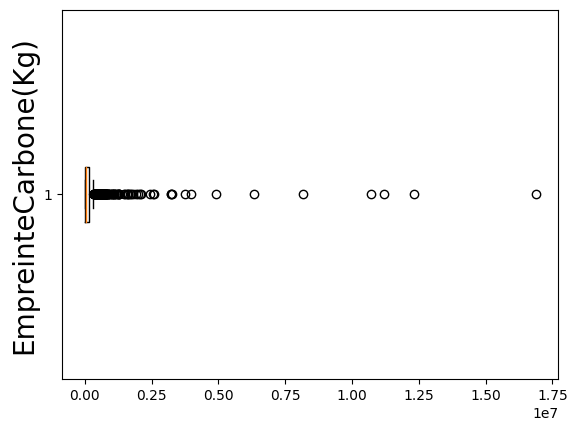

In [43]:
plt.boxplot(data_CO2['EmpreinteCarbone(Kg)'], vert=0, showfliers=True)
plt.ylabel('EmpreinteCarbone(Kg)', fontsize=20)
plt.xticks(fontsize=10)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

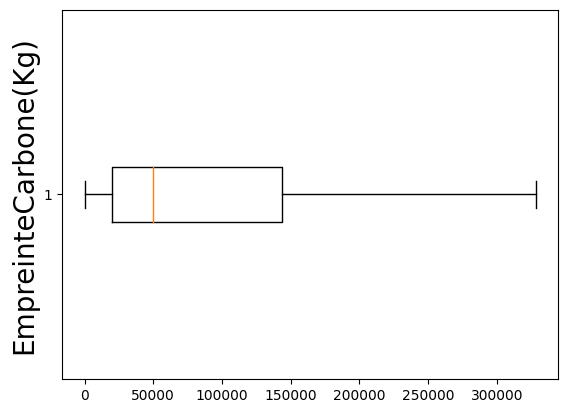

In [44]:
plt.boxplot(data_CO2['EmpreinteCarbone(Kg)'], vert=0, showfliers=False)
plt.ylabel('EmpreinteCarbone(Kg)', fontsize=20)
plt.xticks(fontsize=10)

plt.show

In [45]:
outliers = data_CO2[data_CO2['EmpreinteCarbone(Kg)']>5000000].index
outliers

Index([33, 122, 166, 602, 1610, 1615], dtype='int64')

In [46]:
data_CO2.drop(outliers, inplace=True)

In [47]:
data_CO2 = data_CO2.reset_index()
data_CO2 = data_CO2.drop(columns=['index'])

# SPLIT

In [48]:
y = data_CO2['EmpreinteCarbone(Kg)']
X = data_CO2.drop('EmpreinteCarbone(Kg)', axis=1)

In [49]:
std_scale = preprocessing.StandardScaler()

In [50]:
X = std_scale.fit_transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# BASELINE

In [52]:
estimator = DummyRegressor()
estimator.fit(X_train, y_train)

DummyRegressor()

In [53]:
y_pred = estimator.predict(X_test)

In [54]:
pd.Series(y_pred).value_counts()

155100.268667    330
Name: count, dtype: int64

In [55]:
tr_score = estimator.score(X_train, y_train).round(4)
te_score = estimator.score(X_test, y_test).round(4)

print(f'score train {tr_score} score test {te_score}')

score train 0.0 score test -0.0395


In [56]:
def score(estimator):
    """compute and print train score and test score"""
    
    tr_score = estimator.score(X_train, y_train).round(4)
    te_score = estimator.score(X_test, y_test).round(4)

    print(f'score train {tr_score} score test {te_score}')

In [57]:
score(estimator)

score train 0.0 score test -0.0395


# KNN

In [58]:
from sklearn.model_selection import KFold

In [59]:
from sklearn.neighbors import KNeighborsRegressor

In [60]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan', 'minowski']}

grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [61]:
print(grid.best_score_)
print(grid.best_params_)

0.4498823462289524
{'metric': 'euclidean', 'n_neighbors': 3}


In [62]:
model = grid.best_estimator_
model.score(X_train, y_train)     

0.7583957587724891

In [63]:
score(estimator)

score train 0.0 score test -0.0395


In [64]:
from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15, 17, 19], 'metric': ['euclidean', 'manhattan']}


# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
reg = model_selection.GridSearchCV(
    neighbors.KNeighborsRegressor(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
)

# Optimiser ce classifieur sur le jeu d'entraînement
reg.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(reg.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'metric': 'euclidean', 'n_neighbors': 3}


In [65]:
estimator = KNeighborsRegressor(n_neighbors=3, metric='euclidean')
estimator.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [66]:
y_pred = estimator.predict(X_test)

In [67]:
estimator.score(X_train, y_train)

0.7583957587724891

In [68]:
score(estimator)

score train 0.7584 score test 0.5478


In [69]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.55


In [70]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = estimator.predict(X_train)

mae = round(np.mean(abs(y_train_predict-y_train)),2)
rmse = round(np.sqrt(mean_squared_error(y_train, y_train_predict)),2)
mape = round(np.mean(100 * (abs(y_train_predict-y_train)/ y)),2)
r2 = round(r2_score(y_train, y_train_predict),2)

             
print("La performance du modèle sur la base d'apprentissage ")
print("--------------------------------------")
print("L'erreur absolue moyenne est {}".format(mae))
print("L'erreur quadratique moyenne est {}".format(rmse))
print(("Le pourcencentage de l'erreur absolue moyenne est de {}".format(mape)), '%')
print('le score R2 est {}'.format(r2))
print("\n")

# model evaluation for testing set
mae = round(np.mean(abs(y_pred-y_test)),2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
mape = round(np.mean(100 * (abs(y_pred - y_test) / y_test)),2)
r2 = round(r2_score(y_test, y_pred),2)

print("La performance du modèle sur la base de test")
print("--------------------------------------")
print("L'erreur absolue moyenne est {}".format(mae))
print("L'erreur quadratique moyenne est {}".format(rmse))
print(("Le pourcencentage de l'erreur absolue moyenne est de {}".format(mape)), '%')
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base d'apprentissage 
--------------------------------------
L'erreur absolue moyenne est 70810.06
L'erreur quadratique moyenne est 174534.44
Le pourcencentage de l'erreur absolue moyenne est de 149.29 %
le score R2 est 0.76


La performance du modèle sur la base de test
--------------------------------------
L'erreur absolue moyenne est 71563.53
L'erreur quadratique moyenne est 138812.71
Le pourcencentage de l'erreur absolue moyenne est de 201.04 %
le score R2 est 0.55


In [71]:
import numpy as np

def rmlse(y_pred, y):
    # Calcul de l'erreur pour chaque élément
    errors = np.log(y_pred + 1) - np.log(y_test + 1)
    
    # Calcul de la moyenne des erreurs au carré
    mean_squared_error = np.mean(errors ** 2)
    
    # Calcul de la racine carrée de la moyenne des erreurs au carré
    return np.sqrt(mean_squared_error)

In [72]:
rmlse(y_pred, y_test)

1.2232041441509969

In [73]:
medae = round(np.median(abs(y_train_predict-y_train)),2)
medae

22687.86

# REGRESSION LINEAIRE

In [74]:
estimator = LinearRegression()
estimator.fit(X_train, y_train)

LinearRegression()

In [75]:
estimator.score(X_train, y_train)

0.7805736097474485

In [76]:
score(estimator)

score train 0.7806 score test -2.1753570765280722e+24


In [77]:
y_pred = estimator.predict(X_test)

In [78]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = estimator.predict(X_train)

mae = round(np.mean(abs(y_train_predict-y_train)),2)
rmse = round(np.sqrt(mean_squared_error(y_train, y_train_predict)),2)
mape = round(np.mean(100 * (abs(y_train_predict-y_train)/ y_train)),2)
r2 = round(r2_score(y_train, y_train_predict),2)

             
print("La performance du modèle sur la base d'apprentissage ")
print("--------------------------------------")
print("L'erreur absolue moyenne est {}".format(mae))
print("L'erreur quadratique moyenne est {}".format(rmse))
print(("Le pourcencentage de l'erreur absolue moyenne est de {}".format(mape)), '%')
print('le score R2 est {}'.format(r2))
print("\n")

# model evaluation for testing set
mae = round(np.mean(abs(y_pred-y_test)),2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
mape = round(np.mean(100 * (abs(y_pred - y_test) / y_test)),2)
r2 = round(r2_score(y_test, y_pred),2)

print("La performance du modèle sur la base de test")
print("--------------------------------------")
print("L'erreur absolue moyenne est {}".format(mae))
print("L'erreur quadratique moyenne est {}".format(rmse))
print(("Le pourcencentage de l'erreur absolue moyenne est de {}".format(mape)), '%')
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base d'apprentissage 
--------------------------------------
L'erreur absolue moyenne est 76390.11
L'erreur quadratique moyenne est 166331.03
Le pourcencentage de l'erreur absolue moyenne est de 353.64 %
le score R2 est 0.78


La performance du modèle sur la base de test
--------------------------------------
L'erreur absolue moyenne est 4.068645861316344e+16
L'erreur quadratique moyenne est 3.044505383163694e+17
Le pourcencentage de l'erreur absolue moyenne est de 437071181766267.6 %
le score R2 est -2.175357076528072e+24


In [79]:
rmlse(y_pred, y_test)

2.8951692877764286

In [80]:
# On entraîne ce modèle sur les données d'entrainement
estimator.fit(X_train,y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
baseline_error = np.mean((estimator.predict(X_test) - y_test) ** 2)

print(baseline_error)

9.269013028112714e+34


In [81]:
estimator = linear_model.Lasso(alpha=0.1)

In [82]:
estimator.fit(X_train, y_train) # entrainement du modele


Lasso(alpha=0.1)

In [83]:
score(estimator)

score train 0.7806 score test 0.3478


In [84]:
y_pred = estimator.predict(X_test)

In [85]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = estimator.predict(X_train)

mae = round(np.mean(abs(y_train_predict-y_train)),2)
rmse = round(np.sqrt(mean_squared_error(y_train, y_train_predict)),2)
mape = round(np.mean(100 * (abs(y_train_predict-y_train)/ y_train)),2)
r2 = round(r2_score(y_train, y_train_predict),2)

             
print("La performance du modèle sur la base d'apprentissage ")
print("--------------------------------------")
print("L'erreur absolue moyenne est {}".format(mae))
print("L'erreur quadratique moyenne est {}".format(rmse))
print(("Le pourcencentage de l'erreur absolue moyenne est de {}".format(mape)), '%')
print('le score R2 est {}'.format(r2))
print("\n")

# model evaluation for testing set
mae = round(np.mean(abs(y_pred-y_test)),2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
mape = round(np.mean(100 * (abs(y_pred - y_test) / y_test)),2)
r2 = round(r2_score(y_test, y_pred),2)

print("La performance du modèle sur la base de test")
print("--------------------------------------")
print("L'erreur absolue moyenne est {}".format(mae))
print("L'erreur quadratique moyenne est {}".format(rmse))
print(("Le pourcencentage de l'erreur absolue moyenne est de {}".format(mape)), '%')
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base d'apprentissage 
--------------------------------------
L'erreur absolue moyenne est 76318.15
L'erreur quadratique moyenne est 166328.94
Le pourcencentage de l'erreur absolue moyenne est de 351.03 %
le score R2 est 0.78


La performance du modèle sur la base de test
--------------------------------------
L'erreur absolue moyenne est 83049.35
L'erreur quadratique moyenne est 166702.87
Le pourcencentage de l'erreur absolue moyenne est de 262.18 %
le score R2 est 0.35


In [86]:
rmlse(y_pred, y_test)

1.2169671796436317

In [87]:
from sklearn.linear_model import RidgeCV

In [88]:
estimator = RidgeCV().fit(X_train, y_train)
estimator.score(X_train, y_train)

0.7804265366378641

In [89]:
y_pred = estimator.predict(X_test)

In [90]:
score(estimator)

score train 0.7804 score test 0.4181


In [91]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.42


In [92]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = estimator.predict(X_train)

mae = round(np.mean(abs(y_train_predict-y_train)),2)
rmse = round(np.sqrt(mean_squared_error(y_train, y_train_predict)),2)
mape = round(np.mean(100 * (abs(y_train_predict-y_train)/ y_train)),2)
r2 = round(r2_score(y_train, y_train_predict),2)

             
print("La performance du modèle sur la base d'apprentissage ")
print("--------------------------------------")
print("L'erreur absolue moyenne est {}".format(mae))
print("L'erreur quadratique moyenne est {}".format(rmse))
print(("Le pourcencentage de l'erreur absolue moyenne est de {}".format(mape)), '%')
print('le score R2 est {}'.format(r2))
print("\n")

# model evaluation for testing set
mae = round(np.mean(abs(y_pred-y_test)),2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
mape = round(np.mean(100 * (abs(y_pred - y_test) / y_test)),2)
r2 = round(r2_score(y_test, y_pred),2)

print("La performance du modèle sur la base de test")
print("--------------------------------------")
print("L'erreur absolue moyenne est {}".format(mae))
print("L'erreur quadratique moyenne est {}".format(rmse))
print(("Le pourcencentage de l'erreur absolue moyenne est de {}".format(mape)), '%')
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base d'apprentissage 
--------------------------------------
L'erreur absolue moyenne est 76468.81
L'erreur quadratique moyenne est 166386.76
Le pourcencentage de l'erreur absolue moyenne est de 356.06 %
le score R2 est 0.78


La performance du modèle sur la base de test
--------------------------------------
L'erreur absolue moyenne est 80796.23
L'erreur quadratique moyenne est 157456.44
Le pourcencentage de l'erreur absolue moyenne est de 263.83 %
le score R2 est 0.42


In [93]:
rmlse(y_pred, y_test)

1.2301065966053646

In [94]:
from sklearn.linear_model import ElasticNetCV

In [95]:
estimator = ElasticNetCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
estimator.score(X_train, y_train)

0.7772253604584657

In [96]:
y_pred = estimator.predict(X_test)

In [97]:
score(estimator)

score train 0.7772 score test 0.5174


In [98]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.52


In [99]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = estimator.predict(X_train)

mae = round(np.mean(abs(y_train_predict-y_train)),2)
rmse = round(np.sqrt(mean_squared_error(y_train, y_train_predict)),2)
mape = round(np.mean(100 * (abs(y_train_predict-y_train)/ y_train)),2)
r2 = round(r2_score(y_train, y_train_predict),2)

             
print("La performance du modèle sur la base d'apprentissage ")
print("--------------------------------------")
print("L'erreur absolue moyenne est {}".format(mae))
print("La racine carrée de l'erreur quadratique moyenne est {}".format(rmse))
print(("Le pourcencentage de l'erreur absolue moyenne est de {}".format(mape)), '%')
print('le score R2 est {}'.format(r2))
print("\n")

# model evaluation for testing set
mae = round(np.mean(abs(y_pred-y_test)),2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
mape = round(np.mean(100 * (abs(y_pred - y_test) / y_test)),2)
r2 = round(r2_score(y_test, y_pred),2)

print("La performance du modèle sur la base de test")
print("--------------------------------------")
print("L'erreur absolue moyenne est {}".format(mae))
print("La racine carrée de l'erreur quadratique moyenne est {}".format(rmse))
print(("Le pourcencentage de l'erreur absolue moyenne est de {}".format(mape)), '%')
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base d'apprentissage 
--------------------------------------
L'erreur absolue moyenne est 77581.6
La racine carrée de l'erreur quadratique moyenne est 167595.26
Le pourcencentage de l'erreur absolue moyenne est de 380.65 %
le score R2 est 0.78


La performance du modèle sur la base de test
--------------------------------------
L'erreur absolue moyenne est 78004.03
La racine carrée de l'erreur quadratique moyenne est 143404.0
Le pourcencentage de l'erreur absolue moyenne est de 285.97 %
le score R2 est 0.52


In [100]:
rmlse(y_pred, y_test)

1.2304475551312528

In [101]:
from sklearn.linear_model import LassoCV

In [102]:
estimator = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
estimator.score(X_train, y_train)

0.7805791161320164

In [103]:
y_pred = estimator.predict(X_test)

In [104]:
score(estimator)

score train 0.7806 score test 0.3486


In [105]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.35


In [106]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = estimator.predict(X_train)

mae = round(np.mean(abs(y_train_predict-y_train)),2)
rmse = round(np.sqrt(mean_squared_error(y_train, y_train_predict)),2)
mape = round(np.mean(100 * (abs(y_train_predict-y_train)/ y_train)),2)
r2 = round(r2_score(y_train, y_train_predict),2)

             
print("La performance du modèle sur la base d'apprentissage ")
print("--------------------------------------")
print("L'erreur absolue moyenne est {}".format(mae))
print("La racine carrée de l'erreur quadratique moyenne est {}".format(rmse))
print(("Le pourcencentage de l'erreur absolue moyenne est de {}".format(mape)), '%')
print('le score R2 est de {}'.format(r2))
print("\n")

# model evaluation for testing set
mae = round(np.mean(abs(y_pred-y_test)),2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
mape = round(np.mean(100 * (abs(y_pred - y_test) / y_test)),2)
r2 = round(r2_score(y_test, y_pred),2)

print("La performance du modèle sur la base de test")
print("--------------------------------------")
print("L'erreur absolue moyenne est {}".format(mae))
print("La racine carrée de l'erreur quadratique moyenne est {}".format(rmse))
print(("Le pourcencentage de l'erreur absolue moyenne est de {}".format(mape)), '%')
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base d'apprentissage 
--------------------------------------
L'erreur absolue moyenne est 76318.76
La racine carrée de l'erreur quadratique moyenne est 166328.94
Le pourcencentage de l'erreur absolue moyenne est de 351.04 %
le score R2 est de 0.78


La performance du modèle sur la base de test
--------------------------------------
L'erreur absolue moyenne est 83026.55
La racine carrée de l'erreur quadratique moyenne est 166598.09
Le pourcencentage de l'erreur absolue moyenne est de 262.16 %
le score R2 est 0.35


In [107]:
rmlse(y_pred, y_test)

1.2166297584148844

In [108]:
from sklearn.ensemble import GradientBoostingRegressor

In [109]:
param_grid_estimator =  {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,200,300, 400, 500],
                  'max_depth'    : [4,6,8,10]
                 }

In [110]:
grid_search_estimator = GridSearchCV(GradientBoostingRegressor(), param_grid_estimator,n_jobs=-1, cv=5, scoring = 'neg_mean_squared_error')
grid_search_estimator.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]},
             scoring='neg_mean_squared_error')

In [111]:
print ("Score final : ", round(grid_search_estimator.score(X_train, y_train) *100,4), " %")
print ("Meilleurs parametres: ", grid_search_estimator.best_params_)
print ("Meilleure config: ", grid_search_estimator.best_estimator_)

Score final :  -2225807630840.8804  %
Meilleurs parametres:  {'learning_rate': 0.02, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.2}
Meilleure config:  GradientBoostingRegressor(learning_rate=0.02, max_depth=8, n_estimators=200,
                          subsample=0.2)


In [112]:
estimator =  GradientBoostingRegressor(learning_rate=0.02, n_estimators=300, max_depth=10, subsample=0.2, random_state=0)
estimator.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=10, n_estimators=300,
                          random_state=0, subsample=0.2)

In [113]:
estimator.score(X_train, y_train)

0.8706170321666753

In [114]:
y_pred = estimator.predict(X_test)

In [115]:
tr_score = estimator.score(X_train, y_train).round(4)
te_score = estimator.score(X_test, y_test).round(4)

print(f'score train {tr_score} score test {te_score}')

score train 0.8706 score test 0.5475


In [116]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.55


In [117]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = estimator.predict(X_train)

mae = round(np.mean(abs(y_train_predict-y_train)),2)
rmse = round(np.sqrt(mean_squared_error(y_train, y_train_predict)),2)
mape = round(np.mean(100 * (abs(y_train_predict-y_train)/ y_train)),2)
r2 = round(r2_score(y_train, y_train_predict),2)

             
print("La performance du modèle sur la base d'apprentissage ")
print("--------------------------------------")
print("L'erreur absolue moyenne est {}".format(mae))
print("La racine carrée de l'erreur quadratique moyenne est {}".format(rmse))
print(("Le pourcencentage de l'erreur absolue moyenne est de {}".format(mape)), '%')
print('le score R2 est {}'.format(r2))
print("\n")

# model evaluation for testing set
mae = round(np.mean(abs(y_pred-y_test)),2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
mape = round(np.mean(100 * (abs(y_pred - y_test) / y_test)),2)
r2 = round(r2_score(y_test, y_pred),2)

print("La performance du modèle sur la base de test")
print("--------------------------------------")
print("L'erreur absolue moyenne est {}".format(mae))
print("La racine carrée de l'erreur quadratique moyenne est {}".format(rmse))
print(("Le pourcencentage de l'erreur absolue moyenne est de {}".format(mape)), '%')
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base d'apprentissage 
--------------------------------------
L'erreur absolue moyenne est 71012.58
La racine carrée de l'erreur quadratique moyenne est 127722.5
Le pourcencentage de l'erreur absolue moyenne est de 372.94 %
le score R2 est 0.87


La performance du modèle sur la base de test
--------------------------------------
L'erreur absolue moyenne est 74583.1
La racine carrée de l'erreur quadratique moyenne est 138855.8
Le pourcencentage de l'erreur absolue moyenne est de 303.36 %
le score R2 est 0.55


In [118]:
rmlse(y_pred, y_test)

1.2504623389743328

# METHODES ENSEMBLISTES

In [119]:
from sklearn.ensemble import GradientBoostingRegressor

In [120]:
param_grid_estimator =  {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,200,300, 400, 500],
                  'max_depth'    : [4,6,8,10]
                 }

In [121]:
grid_search_estimator = GridSearchCV(GradientBoostingRegressor(), param_grid_estimator, n_jobs=-1, cv=5, scoring = 'neg_mean_squared_error')
grid_search_estimator.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]},
             scoring='neg_mean_squared_error')

In [122]:
print ("Score final : ", round(grid_search_estimator.score(X_train, y_train) *100,4), " %")
print ("Meilleurs parametres: ", grid_search_estimator.best_params_)
print ("Meilleure config: ", grid_search_estimator.best_estimator_)

Score final :  -2158334669797.7185  %
Meilleurs parametres:  {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 400, 'subsample': 0.2}
Meilleure config:  GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=400,
                          subsample=0.2)


In [123]:
estimator =  GradientBoostingRegressor(learning_rate=0.02, n_estimators=300, max_depth=10, subsample=0.2, random_state=0)
estimator.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=10, n_estimators=300,
                          random_state=0, subsample=0.2)

In [124]:
estimator.score(X_train, y_train)

0.8706170321666753

In [125]:
y_pred = estimator.predict(X_test)

In [126]:
tr_score = estimator.score(X_train, y_train).round(4)
te_score = estimator.score(X_test, y_test).round(4)

print(f'score train {tr_score} score test {te_score}')

score train 0.8706 score test 0.5475


In [127]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.55


In [128]:
estimator = grid_search_estimator.best_estimator_
estimator.score(X_test, y_test)

0.5717380512757919

In [129]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = estimator.predict(X_train)

mae = round(np.mean(abs(y_train_predict-y_train)),2)
rmse = round(np.sqrt(mean_squared_error(y_train, y_train_predict)),2)
mape = round(np.mean(100 * (abs(y_train_predict-y_train)/ y_train)),2)
r2 = round(r2_score(y_train, y_train_predict),2)

             
print("La performance du modèle sur la base d'apprentissage ")
print("--------------------------------------")
print("L'erreur absolue moyenne est {}".format(mae))
print("L'erreur quadratique moyenne est {}".format(rmse))
print(("Le pourcencentage de l'erreur absolue moyenne est de {}".format(mape)), '%')
print('le score R2 est {}'.format(r2))
print("\n")

# model evaluation for testing set
mae = round(np.mean(abs(y_pred-y_test)),2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
mape = round(np.mean(100 * (abs(y_pred - y_test) / y_test)),2)
r2 = round(r2_score(y_test, y_pred),2)

print("La performance du modèle sur la base de test")
print("--------------------------------------")
print("L'erreur absolue moyenne est {}".format(mae))
print("L'erreur quadratique moyenne est {}".format(rmse))
print(("Le pourcencentage de l'erreur absolue moyenne est de {}".format(mape)), '%')
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base d'apprentissage 
--------------------------------------
L'erreur absolue moyenne est 78160.96
L'erreur quadratique moyenne est 146912.72
Le pourcencentage de l'erreur absolue moyenne est de 430.81 %
le score R2 est 0.83


La performance du modèle sur la base de test
--------------------------------------
L'erreur absolue moyenne est 74583.1
L'erreur quadratique moyenne est 138855.8
Le pourcencentage de l'erreur absolue moyenne est de 303.36 %
le score R2 est 0.55


In [130]:
rmlse(y_pred, y_test)

1.2504623389743328

In [131]:
from xgboost import XGBRegressor

In [132]:
estimator =   XGBRegressor(random_state=0)
estimator.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [133]:
estimator.score(X_train, y_train)

0.9818749961151707

In [134]:
y_pred = estimator.predict(X_test)

In [135]:
tr_score = estimator.score(X_train, y_train).round(4)
te_score = estimator.score(X_test, y_test).round(4)

print(f'score train {tr_score} score test {te_score}')

score train 0.9819 score test 0.4395


In [136]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.44


In [137]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = estimator.predict(X_train)

mae = round(np.mean(abs(y_train_predict-y_train)),2)
rmse = round(np.sqrt(mean_squared_error(y_train, y_train_predict)),2)
mape = round(np.mean(100 * (abs(y_train_predict-y_train)/ y_train)),2)
r2 = round(r2_score(y_train, y_train_predict),2)

             
print("La performance du modèle sur la base d'apprentissage ")
print("--------------------------------------")
print("L'erreur absolue moyenne est {}".format(mae))
print("L'erreur quadratique moyenne est {}".format(rmse))
print(("Le pourcencentage de l'erreur absolue moyenne est de {}".format(mape)), '%')
print('le score R2 est {}'.format(r2))
print("\n")

# model evaluation for testing set
mae = round(np.mean(abs(y_pred-y_test)),2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
mape = round(np.mean(100 * (abs(y_pred - y_test) / y_test)),2)
r2 = round(r2_score(y_test, y_pred),2)

print("La performance du modèle sur la base de test")
print("--------------------------------------")
print("L'erreur absolue moyenne est {}".format(mae))
print("L'erreur quadratique moyenne est {}".format(rmse))
print(("Le pourcencentage de l'erreur absolue moyenne est de {}".format(mape)), '%')
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base d'apprentissage 
--------------------------------------
L'erreur absolue moyenne est 33255.83
L'erreur quadratique moyenne est 47804.4
Le pourcencentage de l'erreur absolue moyenne est de 258.22 %
le score R2 est 0.98


La performance du modèle sur la base de test
--------------------------------------
L'erreur absolue moyenne est 73215.89
L'erreur quadratique moyenne est 154533.24
Le pourcencentage de l'erreur absolue moyenne est de 264.28 %
le score R2 est 0.44


In [138]:
rmlse(y_pred, y_test)

1.19186875993708

In [139]:
from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor(n_estimators=10000, random_state=0)
estimator = bagging.fit(X_train, y_train)

In [140]:
estimator.score(X_train, y_train)

0.9321160422482504

In [141]:
y_pred = estimator.predict(X_test)

In [142]:
score(estimator)

score train 0.9321 score test 0.5642


In [143]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.56


# BAGGING REGRESSOR

In [144]:
from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor(n_estimators=10000, n_jobs=-1, random_state=0)
estimator = bagging.fit(X_train, y_train)

In [145]:
estimator.score(X_train, y_train)

0.9321160422482488

In [146]:
y_pred = estimator.predict(X_test)

In [147]:
score(estimator)

score train 0.9321 score test 0.5642


In [148]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.56


# LINEARSVR

In [149]:
from sklearn.svm import LinearSVR

In [150]:
param_grid_estimator =  { 'C': np.arange(1, 11), 
                         'loss':('epsilon_insensitive', 'squared_epsilon_insensitive')}

In [151]:
grid_search_estimator = GridSearchCV(LinearSVR(), param_grid_estimator, refit = True, verbose = 3, n_jobs=-1, cv=5)
grid_search_estimator.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LinearSVR(), n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'loss': ('epsilon_insensitive',
                                  'squared_epsilon_insensitive')},
             verbose=3)

In [152]:
print ("Score final : ", round(grid_search_estimator.score(X_train, y_train) *100,4), " %")
print ("Meilleurs parametres: ", grid_search_estimator.best_params_)
print ("Meilleure config: ", grid_search_estimator.best_estimator_)

Score final :  77.8607  %
Meilleurs parametres:  {'C': 1, 'loss': 'squared_epsilon_insensitive'}
Meilleure config:  LinearSVR(C=1, loss='squared_epsilon_insensitive')


In [153]:
estimator =  LinearSVR(C=1, loss='squared_epsilon_insensitive', random_state=52)
estimator.fit(X_train, y_train)

LinearSVR(C=1, loss='squared_epsilon_insensitive', random_state=52)

In [154]:
estimator.score(X_train, y_train)

0.7790589749213137

In [155]:
y_pred = estimator.predict(X_test)

In [156]:
tr_score = estimator.score(X_train, y_train).round(4)
te_score = estimator.score(X_test, y_test).round(4)

print(f'score train {tr_score} score test {te_score}')

score train 0.7791 score test 0.3165


In [157]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.32


# DECISION TREE

In [158]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [159]:
estimator = DecisionTreeRegressor(random_state=0)

In [160]:
cross_val_score(estimator, X_train, y_train, cv=10)
estimator.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [161]:
y_pred = estimator.predict(X_test)

In [162]:
score(estimator)

score train 1.0 score test 0.2806


In [163]:
estimator.score(X_train, y_train)

0.999999879394057

In [164]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.28


<Axes: xlabel='EmpreinteCarbone(Kg)', ylabel='Density'>

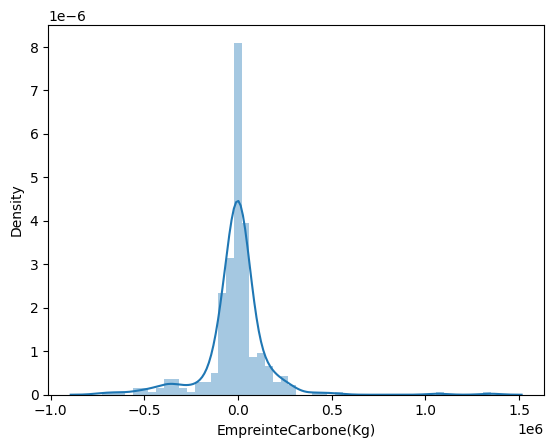

In [165]:
# checking difference between labled y and predicted y
sns.distplot(y_test-y_pred)

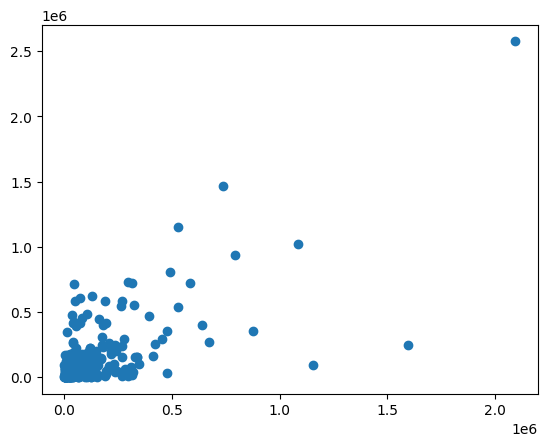

In [166]:
plt.scatter(y_test,y_pred)

In [167]:
param_grid_estimator={"splitter":["best","random"],
                      "max_depth" : [1,3,5,7,9,11,12],
                      "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
                      "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                      "max_features":["auto","log2","sqrt",None],
                      "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [168]:
grid_search_estimator = GridSearchCV(DecisionTreeRegressor(), param_grid_estimator, cv=5)
grid_search_estimator.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']})

In [169]:
print ("Score final : ", round(grid_search_estimator.score(X_train, y_train) *100,4), " %")
print ("Meilleurs parametres: ", grid_search_estimator.best_params_)
print ("Meilleure config: ", grid_search_estimator.best_estimator_)

Score final :  8.0281  %
Meilleurs parametres:  {'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 40, 'min_samples_leaf': 8, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
Meilleure config:  DecisionTreeRegressor(max_depth=5, max_leaf_nodes=40, min_samples_leaf=8,
                      min_weight_fraction_leaf=0.1)


In [170]:
estimator = DecisionTreeRegressor(max_depth=12, max_leaf_nodes=30, min_samples_leaf=3,
                      min_weight_fraction_leaf=0.1, splitter='best')
estimator.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, max_leaf_nodes=30, min_samples_leaf=3,
                      min_weight_fraction_leaf=0.1)

In [171]:
estimator.score(X_train, y_train)

0.08086058977861732

In [172]:
tr_score = estimator.score(X_train, y_train).round(4)
te_score = estimator.score(X_test, y_test).round(4)

print(f'score train {tr_score} score test {te_score}')

score train 0.0809 score test 0.0113


In [173]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.28


In [174]:
from sklearn.svm import SVR

In [175]:
param_grid = {"splitter":["best","random"],
                      "max_depth" : [1,3,5,7,9,11,12],
                      "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
                      "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                      "max_features":["auto","log2","sqrt",None],
                      "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [176]:
model = DecisionTreeRegressor()

In [177]:
grid = GridSearchCV(model, param_grid, cv=5)

In [178]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']})

In [179]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 40, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
0.08020395503359176


In [180]:
y_pred = grid.predict(X_test)

In [181]:
grid.score(X_train, y_train)

0.08028084124551449

In [182]:
grid.score(X_test, y_test)

0.01583230982262851

In [183]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.02


In [184]:
from sklearn.svm import LinearSVR

In [185]:
param_grid =  { 'C': np.arange(1, 11), 
                         'loss':('epsilon_insensitive', 'squared_epsilon_insensitive')}

In [186]:
grid = GridSearchCV(LinearSVR(), param_grid, refit = True, verbose = 3, n_jobs=-1, cv=5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LinearSVR(), n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'loss': ('epsilon_insensitive',
                                  'squared_epsilon_insensitive')},
             verbose=3)

In [187]:
print ("Score final : ", round(grid.score(X_train, y_train) *100,4), " %")
print ("Meilleurs parametres: ", grid.best_params_)
print ("Meilleure config: ", grid.best_estimator_)

Score final :  73.2295  %
Meilleurs parametres:  {'C': 6, 'loss': 'squared_epsilon_insensitive'}
Meilleure config:  LinearSVR(C=6, loss='squared_epsilon_insensitive')


In [188]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LinearSVR(), n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'loss': ('epsilon_insensitive',
                                  'squared_epsilon_insensitive')},
             verbose=3)

In [189]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 4, 'loss': 'squared_epsilon_insensitive'}
0.39464712680674563


In [190]:
y_pred = grid.predict(X_test)

In [191]:
grid.score(X_train, y_train)

0.6756589592650712

In [192]:
grid.score(X_test, y_test)

0.42057972247192543

In [193]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.42


In [194]:
estimator =  LinearSVR(C=1, loss='squared_epsilon_insensitive', random_state=52)
estimator.fit(X_train, y_train)

LinearSVR(C=1, loss='squared_epsilon_insensitive', random_state=52)

In [195]:
estimator.score(X_train, y_train)

0.7790589749213137

In [196]:
y_pred = estimator.predict(X_test)

In [197]:
tr_score = estimator.score(X_train, y_train).round(4)
te_score = estimator.score(X_test, y_test).round(4)

print(f'score train {tr_score} score test {te_score}')

score train 0.7791 score test 0.3165


In [198]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.32


In [199]:
from xgboost import XGBRegressor

In [200]:
param_grid = {'max_depth': ("max_depth", 3, 18, 1),
        'gamma':  ('gamma', 1,9),
        'reg_alpha' : ('reg_alpha', 40,180,1),
        'reg_lambda' : ('reg_lambda', 0,1),
        'colsample_bytree' : ('colsample_bytree', 0.5,1),
        'min_child_weight' : ('min_child_weight', 0, 10, 1),
        'n_estimators': [10,100,500,1000]
    }

In [201]:
grid = GridSearchCV(XGBRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1, cv=5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6912 candidates, totalling 34560 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': ('colsample_bytree', 0.5, 1),
                         'gamma': ('gamma', 1, 9),
                         'max_depth': ('max_depth', 3, 18, 1),
                         'min_child_weight': ('min_child_weight', 0, 10, 1),
                         'n_estimators': [10, 100, 500, 1000],
                         'reg_alpha': ('reg_alpha', 40, 180, 1),
                         'reg_lambda': ('reg_lambda', 0, 1)},
             verbose=3)

In [202]:
print ("Score final : ", round(grid.score(X_train, y_train) *100,4), " %")
print ("Meilleurs parametres: ", grid.best_params_)
print ("Meilleure config: ", grid.best_estimator_)

Score final :  93.5418  %
Meilleurs parametres:  {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 0, 'n_estimators': 100, 'reg_alpha': 40, 'reg_lambda': 1}
Meilleure config:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=0, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [203]:
print(grid.best_params_)
print(grid.best_score_)

{'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 0, 'n_estimators': 100, 'reg_alpha': 40, 'reg_lambda': 1}
0.40023718415378734


In [204]:
y_pred = grid.predict(X_test)

In [205]:
grid.score(X_train, y_train)

0.9354179812811618

In [206]:
grid.score(X_test, y_test)

0.48500272383767584

In [207]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.49


In [208]:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=18, min_child_weight=0,
             monotone_constraints='()', n_estimators=10, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=180, reg_lambda=0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None).fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1, gpu_id=-1,
             grow_policy=None, importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=18,
             max_leaves=None, min_child_weight=0, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)